<a href="https://colab.research.google.com/github/BrainConnection/Qiskit/blob/main/Project_Quanutm_Challenge_2023/Quantum_Challenge_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram

In [3]:
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

In [4]:
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

sampler = Sampler(backend=backend)

#1. Fair Quantum Coin Operator & Four-Sided Fair Quantum Coin Operator

2) Fair Quantum Coin Operator

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


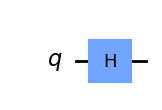

In [5]:
Two_Sided_Fair_Coin = QuantumCircuit(1)
Two_Sided_Fair_Coin.h(0)
Two_Sided_Fair_Coin.draw("mpl")

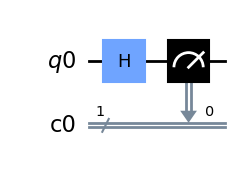

In [6]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
Two_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

Two_Sided_Fair_Coin_Circuit.h(q0)
Two_Sided_Fair_Coin_Circuit.measure(q0, c0)

Two_Sided_Fair_Coin_Circuit.draw("mpl")

In [7]:
job = sampler.run(Two_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> Job ID: cl7l40h5o5utp9bnlgig
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.49874, 0: 0.50126}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.49874, 0: 0.50126}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


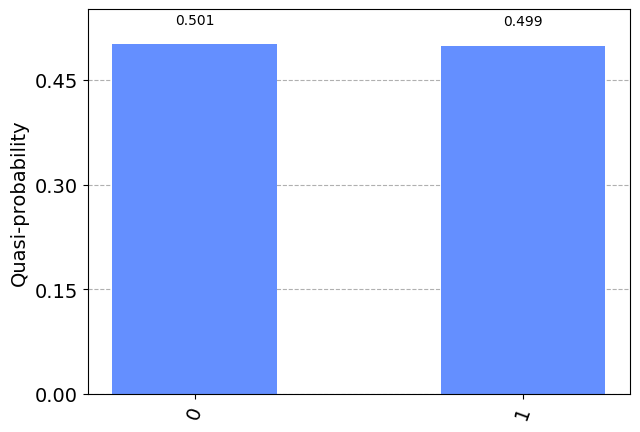

In [8]:
counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

4) Four-Sided Fair Quantum Coin Operator

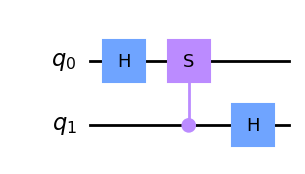

In [9]:
from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(1) # the parameter is the amount of control points you want

Four_Sided_Fair_Coin = QuantumCircuit(2)
Four_Sided_Fair_Coin.h(0)
Four_Sided_Fair_Coin.append(csgate, [1, 0])
Four_Sided_Fair_Coin.h(1)

Four_Sided_Fair_Coin.draw("mpl")

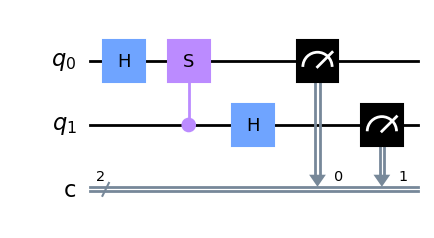

In [10]:
qubits = QuantumRegister(2, 'q')
clbits = ClassicalRegister(2, 'c')
Four_Sided_Fair_Coin_Circuit = QuantumCircuit(qubits, clbits)
(q0,q1,) = qubits
(c0,c1,) = clbits

Four_Sided_Fair_Coin_Circuit.h(q0)
Four_Sided_Fair_Coin_Circuit.append(csgate, [q1, q0])
Four_Sided_Fair_Coin_Circuit.h(q1)
Four_Sided_Fair_Coin_Circuit.measure(qubits, clbits)

Four_Sided_Fair_Coin_Circuit.draw("mpl")

In [11]:
job = sampler.run(Four_Sided_Fair_Coin_Circuit, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> Job ID: cl7l4195o5utp9bnlh1g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 0.24838, 2: 0.2499, 0: 0.25093, 3: 0.25079}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 0.24838, 2: 0.2499, 0: 0.25093, 3: 0.25079}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


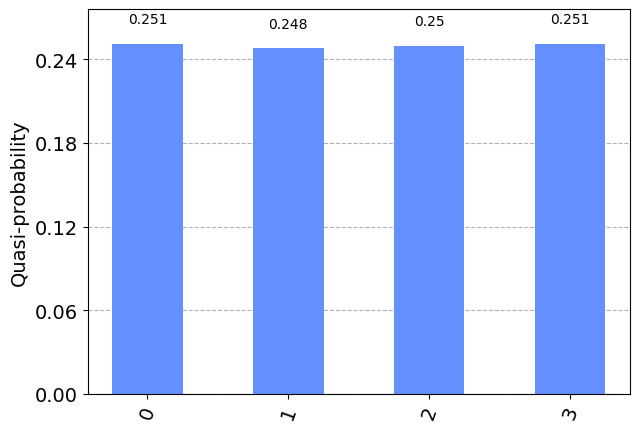

In [12]:
counts = dict(result.quasi_dists[0])
plot_histogram(counts, sort='asc')

#3. Quantum Coin with Shift Operator

1) Shift Operator

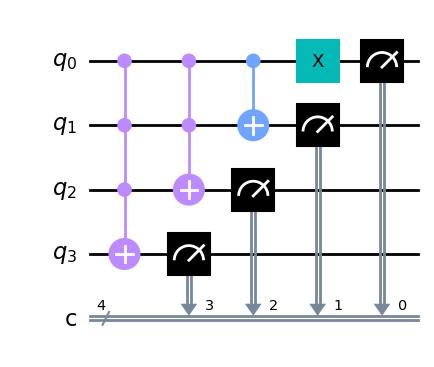

In [13]:
from qiskit.circuit.library.standard_gates import C3XGate

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
Shift = QuantumCircuit(qreg_q, creg_c)

Shift.append(C3XGate(), [qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3]])
Shift.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
Shift.cx(qreg_q[0], qreg_q[1])
Shift.x(qreg_q[0])

Shift.measure(qreg_q, creg_c)

Shift.draw("mpl")

>>> Job ID: cl7l42l7pau17fkuod4g
>>> Job Status: JobStatus.RUNNING
>>> SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 100000, 'circuit_metadata': {}}])
  > Quasi-probability distribution: {1: 1.0}
  > Metadata: {'shots': 100000, 'circuit_metadata': {}}


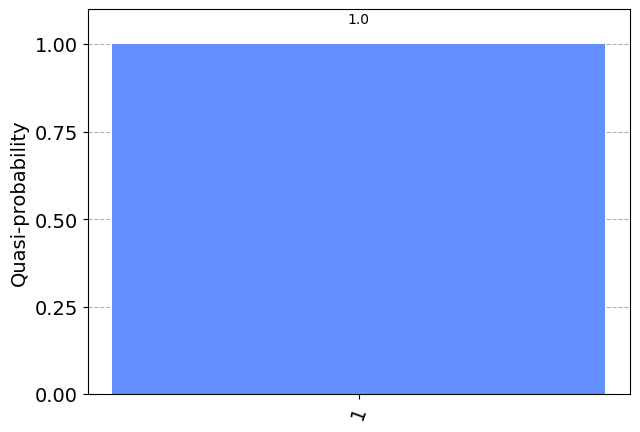

In [14]:
job = sampler.run(Shift, shots=100000)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

cnts = dict(result.quasi_dists[0])
plot_histogram(cnts, sort='asc')

2) Shift Operator with Quantum Coin Operator